Function
--
$$f(x) = x^3-2\cdot x^2 + 2$$

Derivative
--
$$f'(x) = 3\cdot x^2 -2\cdot x$$

In [5]:
import numpy as np
import matplotlib.pyplot as plt

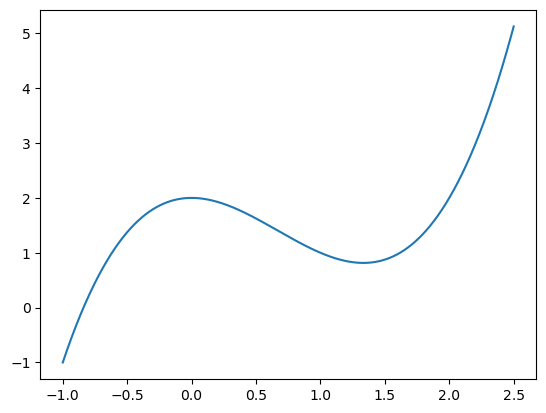

In [6]:
x = np.linspace(-1, 2.5, 1000)
f = lambda x: x**3-2*x**2+2

plt.plot(x, f(x))
plt.show()

In [7]:
f_prime = lambda x: 3*x**2-4*x

# set these randomly
x_old = 0
x_new = 2

eta = 0.1
precision = 1e-4
x_list, y_list = [x_new], [f(x_new)]


while abs(x_new - x_old)> precision:
  x_old = x_new
  x_new = x_old - eta*f_prime(x_old)
  x_list.append(x_new)
  y_list.append(f(x_new))

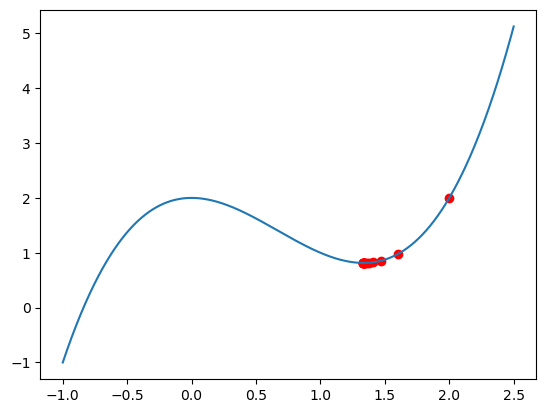

In [8]:
plt.plot(x, f(x))
plt.scatter(x_list, y_list, c='r')
plt.show()

eta is how fast we are moving and then we update the minimun value 

In [9]:
x_list[-1]

1.3334253508453249

$$x = x - \eta \cdot \frac{df}{dx}$$

$$x_{n+1} = x_n - \eta \cdot \frac{df}{dx}|_{x_n}$$

### Set some Neural Networks :

In [10]:
import numpy as np

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Input

from tensorflow.keras.optimizers import SGD

from sklearn.model_selection import train_test_split

# Simple linear regression

In [11]:
np.random.seed(42)
X = np.random.rand(100,1) #100 samples, 1 feature
y = 3*X + 2 + np.random.rand(100,1)*0.1 #y = 3*x + 2 + randomness

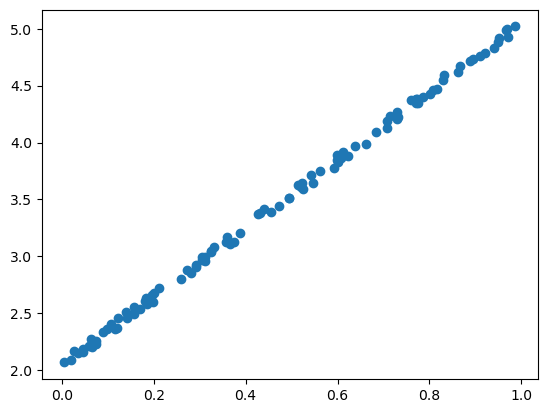

In [12]:
plt.plot(X,y, 'o')
plt.show()

### Linear regression with Keras, secuently 

In [13]:
model = Sequential([
    Input(shape = (1,)),
    Dense(1)
])

Loss function
---
$$L = \frac{1}{n}\sum_{i=1}^n (y_i-\hat y_i)^2$$

$$w\cdot x + b = \hat y$$

### We are finding the perceptron, find the parameters(weights and biases)  of all the perceptron who give minimun error  MSE
### We dont have activation function because our problem is linear 

In [14]:
model.compile(
    optimizer = SGD(learning_rate = 0.1),
    loss = 'mean_squared_error'
)

### Split the data into train and test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

In [21]:
model.fit(X_train, 
          y_train,
          epochs = 100, # epochs is the number of iterations
          batch_size = 10, # numerical stotastical gradient to avoid memory issues, portion of the data set, speed of the process and not put nothing into the memory
          verbose = 0) # how explicity you want see the output 
        

In [22]:
loss = model.evaluate(X_test, y_test, verbose = 1)
print(loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.0932e-04
0.0006093225674703717


In [23]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [19]:
y_pred

array([[3.8832188],
       [2.1089787],
       [3.6157932],
       [2.9601607],
       [3.1177325],
       [3.4157555],
       [4.7323503],
       [3.3301477],
       [3.533105 ],
       [3.6077967],
       [4.77584  ],
       [4.24373  ],
       [3.5289602],
       [2.6463785],
       [2.6843836],
       [2.3402984],
       [2.5928187],
       [2.1865957],
       [4.4729967],
       [3.8413496]], dtype=float32)

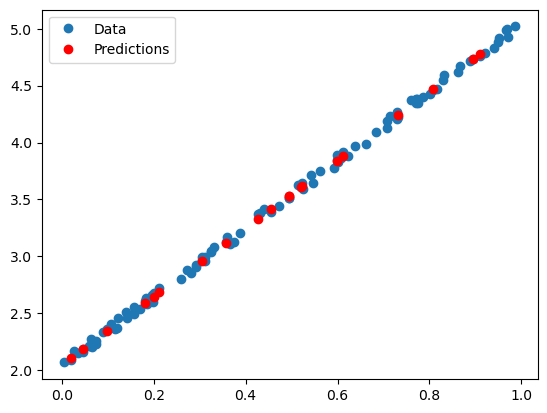

In [20]:
plt.plot(X,y,'o', label = 'Data')
plt.plot(X_test, y_pred, 'ro', label = 'Predictions')
plt.legend()
plt.show()